In [1]:
import pandas as pd
import numpy as np

dataset_path = "/home/public/tweetdatanlp/GeoText.2010-10-12/full_text.txt"

col_names = ["UserID", "Timestamp", "Place", "Latitude", "Longitude", "TweetText"]

df = pd.read_csv(
    dataset_path,
    sep="\t",          
    encoding="latin1",
    dtype={"TweetText": str}, 
    names=col_names,

)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['UnixTimestamp'] = df['Timestamp'].astype('int64') // 10**9

df.head()

,UserID,Timestamp,Place,Latitude,Longitude,TweetText,UnixTimestamp
0,USER_79321756,2010-03-03 04:15:26,"ÃT: 47.528139,-122.197916",47.528139,-122.197916,RT @USER_2ff4faca: IF SHE DO IT 1 MORE TIME......,1267589726
1,USER_79321756,2010-03-03 04:55:32,"ÃT: 47.528139,-122.197916",47.528139,-122.197916,@USER_77a4822d @USER_2ff4faca okay:) lol. Sayi...,1267592132
2,USER_79321756,2010-03-03 05:13:34,"ÃT: 47.528139,-122.197916",47.528139,-122.197916,RT @USER_5d4d777a: YOURE A FAG FOR GETTING IN ...,1267593214
3,USER_79321756,2010-03-03 05:28:02,"ÃT: 47.528139,-122.197916",47.528139,-122.197916,@USER_77a4822d yea ok..well answer that cheap ...,1267594082
4,USER_79321756,2010-03-03 05:56:13,"ÃT: 47.528139,-122.197916",47.528139,-122.197916,A sprite can disappear in her mouth - lil kim ...,1267595773


# Important Metrics
### User Activity Metrics
- Number of users
- Average posts per users
- Highest post by a user
- Lowest post by a user
- Standard deviation of posts per user



Number of users : 9454
Average posts per user : 39.825576475565896
Max posts by a user : 301
Min posts by a user : 2
Median posts per user : 32.0
Std dev of posts per user : 24.412355892822596
Variance of posts per user : 595.9631202378301
Total Tweets posted by all users : 376511


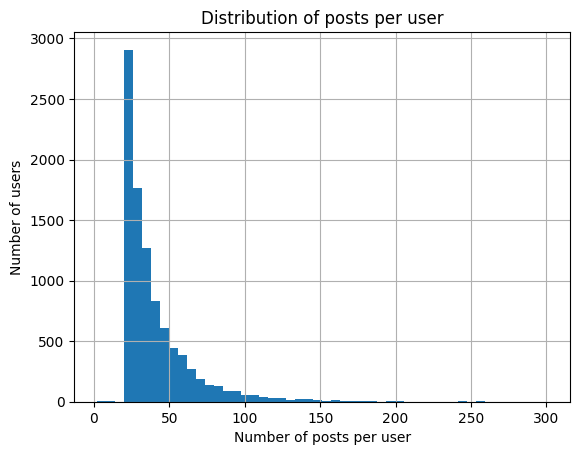

In [2]:
user_post_counts = df.groupby('UserID').size()

num_users = user_post_counts.shape[0] 
avg_posts = user_post_counts.mean()                         
max_posts = user_post_counts.max()                         
min_posts = user_post_counts.min()                          
median_posts = user_post_counts.median()                    
std_posts = user_post_counts.std() 
var_posts = user_post_counts.var()
total_posts = len(df) 

# Display metrics
metrics = {
    "Number of users": num_users,
    "Average posts per user": avg_posts,
    "Max posts by a user": max_posts,
    "Min posts by a user": min_posts,
    "Median posts per user": median_posts,
    "Std dev of posts per user": std_posts,
    "Variance of posts per user": var_posts,
    "Total Tweets posted by all users": total_posts
}


for k, v in metrics.items():
    print(k , ":", v)

import matplotlib.pyplot as plt

user_post_counts.hist(bins=50)
plt.xlabel("Number of posts per user")
plt.ylabel("Number of users")
plt.title("Distribution of posts per user")
plt.show()

Problems that can arise from a skewed dataset
- Bias prediction on more active users (model might think their behaivor dominates the pattern)
    - Model might predict Super-active users -> overfit their patterns
    - Might not generalize to less active users tweets <br>

Possible Solutions
- Oversample the less active users
- Filter out less active users or overly active user (maybe not)

### Temporal Metrics
- Timespan of the dataset
- Average time between tweets

In [4]:
import numpy as np

# Sort by user and timestamp
time_df = df.sort_values(['UserID', 'Timestamp']).reset_index(drop=True)

# Overall time span
time_span = time_df['Timestamp'].max() - time_df['Timestamp'].min()
print(f"Overall dataset time span: {time_span.days} days ({time_span.total_seconds() / 3600:.2f} hours)")
print("=" * 60)

# Compute inter-tweet times per user
inter_tweet_times = time_df.groupby('UserID')['Timestamp'].diff().dropna()

# Convert to hours
inter_tweet_hours = inter_tweet_times.dt.total_seconds() / 3600

# Comprehensive statistics
print("\nInter-Tweet Time Statistics:")
print(f"  Mean:     {inter_tweet_hours.mean():.2f} hours")
print(f"  Median:   {inter_tweet_hours.median():.2f} hours")
print(f"  Std Dev:  {inter_tweet_hours.std():.2f} hours")
print(f"  Min:      {inter_tweet_hours.min():.2f} hours")
print(f"  Max:      {inter_tweet_hours.max():.2f} hours")
print(f"  25th %ile: {inter_tweet_hours.quantile(0.25):.2f} hours")
print(f"  75th %ile: {inter_tweet_hours.quantile(0.75):.2f} hours")
print(f"  95th %ile: {inter_tweet_hours.quantile(0.95):.2f} hours")
print(f"  99th %ile: {inter_tweet_hours.quantile(0.99):.2f} hours")

# Range
print(f"\n  Range:    {inter_tweet_hours.max() - inter_tweet_hours.min():.2f} hours")

# Additional useful metrics
print("\nAlternative time units:")
print(f"  Mean:     {inter_tweet_hours.mean() / 24:.2f} days")
print(f"  Median:   {inter_tweet_hours.median() / 24:.2f} days")
print(f"  Std Dev:  {inter_tweet_hours.std() / 24:.2f} days")

# Per-user statistics
print("\n" + "=" * 60)
print("Per-User Statistics:")
user_stats = time_df.groupby('UserID')['Timestamp'].agg([
    ('num_tweets', 'count'),
    ('first_tweet', 'min'),
    ('last_tweet', 'max'),
])
user_stats['time_span_days'] = (user_stats['last_tweet'] - user_stats['first_tweet']).dt.days
user_stats['avg_tweets_per_day'] = user_stats['num_tweets'] / (user_stats['time_span_days'] + 1)

print(f"  Avg tweets per user: {user_stats['num_tweets'].mean():.2f}")
print(f"  Avg user time span: {user_stats['time_span_days'].mean():.2f} days")
print(f"  Avg tweets per day per user: {user_stats['avg_tweets_per_day'].mean():.2f}")

# Distribution insights
print("\n" + "=" * 60)
print("Distribution Insights:")
print(f"  % of tweets within 1 hour:  {(inter_tweet_hours < 1).sum() / len(inter_tweet_hours) * 100:.2f}%")
print(f"  % of tweets within 1 day:   {(inter_tweet_hours < 24).sum() / len(inter_tweet_hours) * 100:.2f}%")
print(f"  % of tweets within 1 week:  {(inter_tweet_hours < 168).sum() / len(inter_tweet_hours) * 100:.2f}%")
print(f"  % of tweets beyond 1 month: {(inter_tweet_hours > 720).sum() / len(inter_tweet_hours) * 100:.2f}%")

Overall dataset time span: 5 days (121.33 hours)

Inter-Tweet Time Statistics:
  Mean:     2.72 hours
  Median:   0.55 hours
  Std Dev:  5.13 hours
  Min:      0.00 hours
  Max:      103.77 hours
  25th %ile: 0.14 hours
  75th %ile: 2.50 hours
  95th %ile: 13.69 hours
  99th %ile: 23.01 hours

  Range:    103.77 hours

Alternative time units:
  Mean:     0.11 days
  Median:   0.02 days
  Std Dev:  0.21 days

Per-User Statistics:
  Avg tweets per user: 39.83
  Avg user time span: 3.78 days
  Avg tweets per day per user: 8.45

Distribution Insights:
  % of tweets within 1 hour:  60.50%
  % of tweets within 1 day:   99.17%
  % of tweets within 1 week:  100.00%
  % of tweets beyond 1 month: 0.00%


### Spatial Metrics
- Location Standard Deviation

In [6]:
lat_mean, lat_std = df['Latitude'].mean(), df['Latitude'].std()
lon_mean, lon_std = df['Longitude'].mean(), df['Longitude'].std()

print(lat_mean, lat_std)
print(lon_mean, lon_std)

37.696091301009396 4.629906377059784
-84.29228349997197 14.97487779808125


Scatter plot saved!
Total points plotted: 376,511


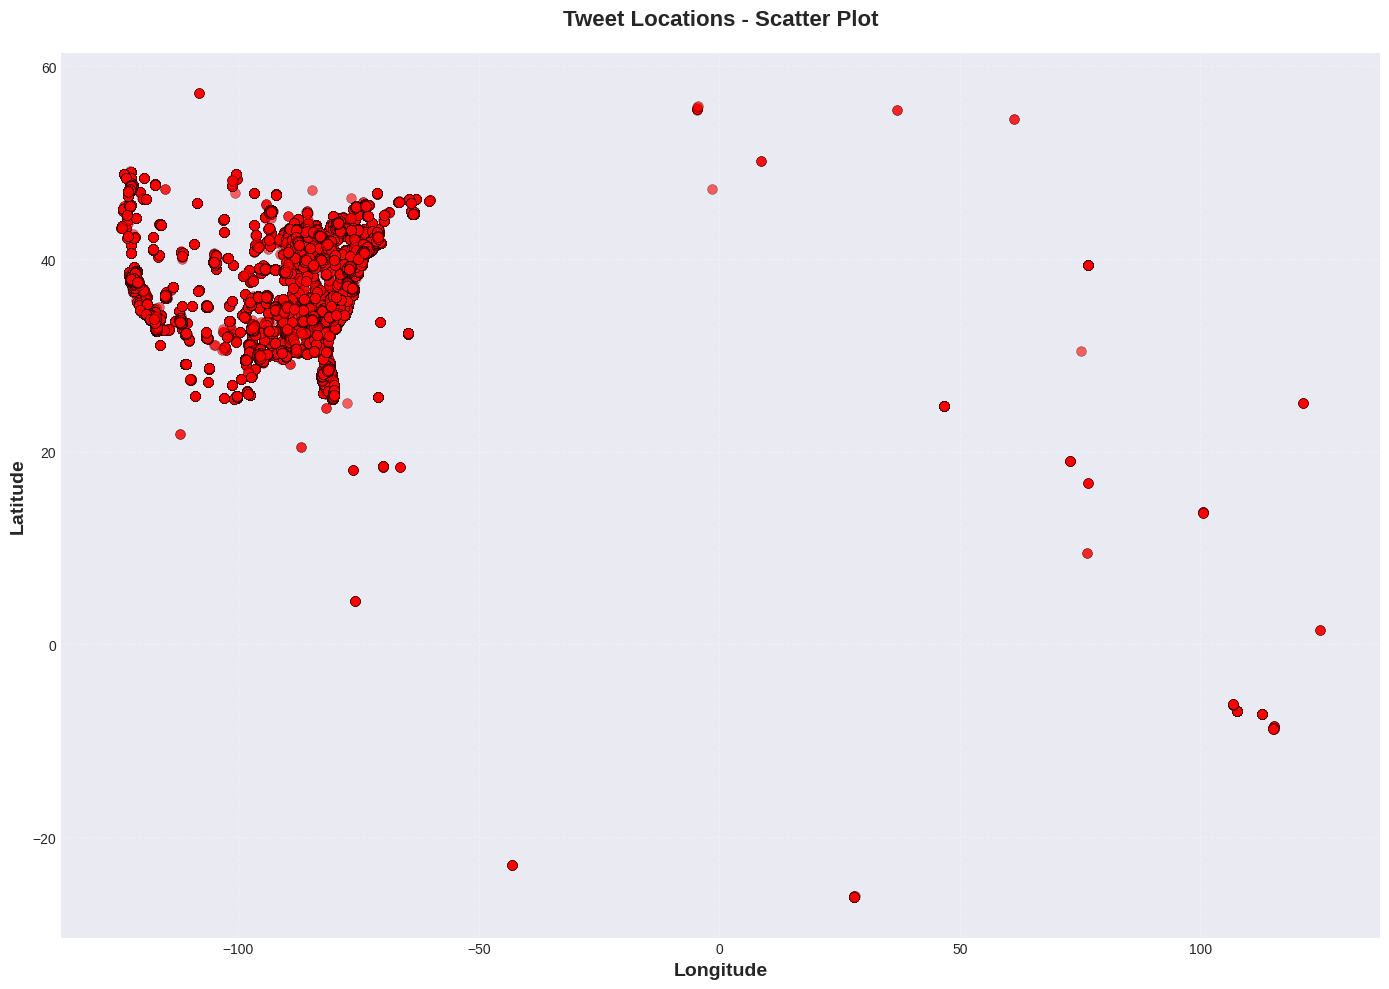

In [ ]:
import matplotlib.pyplot as plt

# Simple scatter plot of lat and lon
fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(
    df['Longitude'],
    df['Latitude'],
    s=50,
    c='red',
    alpha=0.6,
    edgecolors='black',
    linewidth=0.3
)

ax.set_xlabel('Longitude', fontsize=14, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=14, fontweight='bold')
ax.set_title('Tweet Locations - Scatter Plot', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
print(f"Scatter plot saved!")
print(f"Total points plotted: {len(df):,}")

plt.show()


### Tweet metrics

Max tokens in a tweet: 3686
Min tokens in a tweet: 1
Average tokens per tweet: 11.86


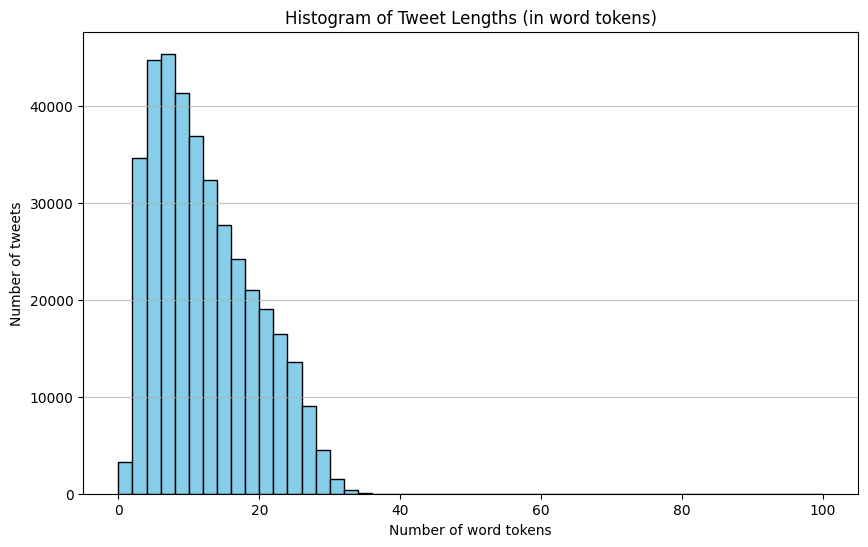

In [4]:
# Count word tokens per tweet
df['NumTokens'] = df['TweetText'].apply(lambda x: len(str(x).split()))

# Compute statistics
max_tokens = df['NumTokens'].max()
min_tokens = df['NumTokens'].min()
avg_tokens = df['NumTokens'].mean()

print(f"Max tokens in a tweet: {max_tokens}")
print(f"Min tokens in a tweet: {min_tokens}")
print(f"Average tokens per tweet: {avg_tokens:.2f}")

import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df['NumTokens'], bins=50, range=(0,100), color='skyblue', edgecolor='black')
plt.title("Histogram of Tweet Lengths (in word tokens)")
plt.xlabel("Number of word tokens")
plt.ylabel("Number of tweets")
plt.grid(axis='y', alpha=0.75)
plt.show()

### Metrics for Bert

In [5]:
# Count tweets with more than 64 tokens
num_long_tweets = (df['NumTokens'] > 64).sum()
total_tweets = len(df)
percent_long = num_long_tweets / total_tweets * 100

print(f"Number of tweets >64 tokens: {num_long_tweets}")
print(f"Percentage of tweets >64 tokens: {percent_long:.2f}%")

mean_tokens = df['NumTokens'].mean()
std_tokens = df['NumTokens'].std()

print(f"Average tokens per tweet: {mean_tokens:.2f}")
print(f"Standard deviation of tokens: {std_tokens:.2f}")

Number of tweets >64 tokens: 26
Percentage of tweets >64 tokens: 0.01%
Average tokens per tweet: 11.86
Standard deviation of tokens: 12.52


- Majority of tweets are short, ≤24 tokens, which makes truncation at 64 tokens completely safe.
- So it won’t be perfectly normal, but std still gives a good sense of spread.
- The data is skewed because of outliers (like the 3686-token tweet).

### Other Metrics (NUll etc.)

In [6]:
df.isnull().sum()

UserID           0
Timestamp        0
Place            0
Latitude         0
Longitude        0
TweetText        2
UnixTimestamp    0
NumTokens        0
dtype: int64

After Normalizing the whole Timestamps of the dataset we found that the minimum unix time: 1267569609 and Max unix time: 1268006399

# Sentence Embeddings

#### MiniLM Sentence Transformer

Would output sentence embeddings of size 384 dimension

In [7]:
import torch
from utils import perform_preprocessing
# 384 Dimensional Vector
from TweetNormalizer import normalizeTweet
from sentence_transformers import SentenceTransformer

dir = "/home/public/tweetdatanlp/GeoText.2010-10-12/full_text.txt"
df = perform_preprocessing(dir)
df = df.sort_values(by=['UserID', 'Timestamp']).reset_index(drop=True)

print("Using # GPU: ", torch.cuda.device_count())
DEVICE = "cuda" if torch.cuda.is_available()  else "cpu"
device = torch.device(f"{DEVICE}:0")
print("using device: ", device)


model = SentenceTransformer("all-MiniLM-L6-v2").to(device)


/home/public/mkamal/virtual_enviroments/nlpproj/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🔧 Performing Preprocessing to return final dataframe ...


KeyboardInterrupt: 

Convert the sentences to embeddings and save to disk
- would take .5 GB of space

In [ ]:
import torch
import numpy as np
from tqdm import tqdm

batch_size = 128
embeddings_list = []

sentences = df["NormalizedText"].tolist()

for i in tqdm(range(0, len(sentences), batch_size)):
    batch = sentences[i:i+batch_size]
    batch_embeddings = model.encode(batch, convert_to_tensor=True, show_progress_bar=False)
    embeddings_list.append(batch_embeddings.cpu().numpy())

100%|██████████| 2940/2940 [02:15<00:00, 21.76it/s]


In [56]:
all_embeddings = np.vstack(embeddings_list)
all_embeddings.shape

(376318, 384)

In [ ]:
np.save("/home/public/tweetdatanlp/sent-trans-dbs/tweet_embeddings.npy", all_embeddings)
df[["UserID", "Timestamp", "Latitude", "Longitude"]].to_csv("/home/public/tweetdatanlp/sent-trans-dbs/tweet_metadata.csv", index=False)
print("Saved to disk")

Saved to disk


DONE- ---------------